# Countries of the World EDA- Data Science Assignment 1

# Contents

- <a href='#1'>1. Abstract</a>
- <a href='#2'>2. Explainations of the analysis and interpretaions of figures and graphs</a>
    - <a href='#2.1'>2.1 Importing Libraries</a>
    - <a href='#2.2'>2.2 Importing Data Set</a>
    - <a href='#2.3'>2.3 Descriptive Analysis - Table Overview</a>
    - <a href='#2.4'>2.4 Data cleaning</a>
    - <a href='#2.5'>2.5 Visualization</a>
    - <a href='#2.6'>2.6 Feature Selection</a>
    - <a href='#2.7'>2.7 Flexibility plots and Box plots</a>
- <a href='#3'>3. Conclusion</a>
- <a href='#4'>4. Contributions statement</a>
- <a href='#5'>5. Citations</a>
- <a href='#6'>6. License</a>

In [ ]:
import pandas as pd  #pandas for using dataframe and reading csv 
import numpy as np   #numpy for vector operations and basic maths 
import urllib        #for url stuff
import re            #for processing regular expressions
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
import scipy         #for other dependancies
from scipy.misc import imread, imresize, imsave  # for plots 
import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib.pyplot import *
from matplotlib import cm

import warnings                 # Ignore  Warnings
warnings.filterwarnings("ignore")

In [ ]:
### <a id="2.2">2.2 Exploring the data</a>

In [ ]:
### Importing Data Set

In [ ]:
data = pd.read_csv('bank-additional-full.csv')
data.head()

# <a id='1'>1. Abstract</a>

**To perform Exploratory Data Analysis to identify the data and relations between multiple factors in the data set taken from The World Factbook which is a public domain and all these data sets are made up from the data by US Government, the goal is to find the factors most affecting a country's Gross Domestic Product per capita Independently using linear regression and to visualize the data to check the range of the factors along with other parameters.**



# <a id='2'>2. Analysis and Interpretations of figures and graphs</a>

<a id="2.1">****2.1 Importing Libraries:****</a>
Python environment comes with number of in-build analytical purpose libraries following are some of the libraries that will be required for EDA(Exploratory Data Analysis) along with brief description of certain Libraries

In [1]:
# importing libraries - Step1
%matplotlib inline 
import matplotlib.pyplot as plt #Used to make change to a figure (Create, Plot, Decorate) 

# Linear Algebra Library
import numpy as np

# Data Processing, CSV file Input/Output
import pandas as pd 

#Statistical Functions
from scipy import stats

# visualization tool
import seaborn as sns

from scipy.stats import pearsonr

#Regular Expression
import re

#Sklearn - scikitlearn - This Library provides simple and efficient tools for data analytics, mining etc.
from sklearn.preprocessing import LabelEncoder        #used to encode labels
from sklearn.model_selection import train_test_split  #Split arrays or matrices into random train and test subsets
from sklearn.linear_model import LinearRegression     #Used to measure linear regression
from sklearn.tree import DecisionTreeRegressor        #Learns local linear regressions approximating the sine curve.
from sklearn.ensemble import RandomForestRegressor    #Random Forest - classifies decision trees based on sub samples
from sklearn.metrics import mean_squared_error        #Returns Mean Square Error

import os
print(os.listdir("..")) #List the files in the root directory

['.DS_Store', 'assignment-1-cassian-gonsalves']


<a id="2.2">****2.2 Importing Data Set****</a>


**Source:** All these data sets are made up of data from the US government. Generally they are free to use if you use the data in the US. If you are outside of the US, you may need to contact the US Govt to ask. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

In [2]:
# importing the dataset .csv file from root folder - Step2 (ds - Data set)
#using world variable name insted of df since it is world data AND CONVINIENT TO USE
world=pd.read_csv("countries of the world.csv", decimal = ',')

In [3]:
#Lists the top 5 records in the imported csv dataset file
world.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


<a id="2.3">****2.3 Descriptive Statistics - Table Overview****</a>

Pandas describe() is used to view some basic statistical details like percentile, mean, standard Deviation etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below.

In [4]:
world.describe() #Generates descriptive statistics excluding NaN(Empty) values.

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [5]:
#Listing of top 20 countries in decending order as per GDP
#.sort_values() --> this is used to sort values based on the factor provided.
top_gdp_countries = world.sort_values('GDP ($ per capita)',ascending=False)
top_gdp_countries[['Country','GDP ($ per capita)']].head(20)

,Country,GDP ($ per capita)
121,Luxembourg,55100.0
154,Norway,37800.0
214,United States,37800.0
22,Bermuda,36000.0
38,Cayman Islands,35000.0
177,San Marino,34600.0
196,Switzerland,32700.0
54,Denmark,31100.0
93,Iceland,30900.0
12,Austria,30000.0


**Following is a bar plot graph with GDP on its x-axis and 33 countries on the y axis it is used to visually represent the GDP so that we can see the differences clearly.**

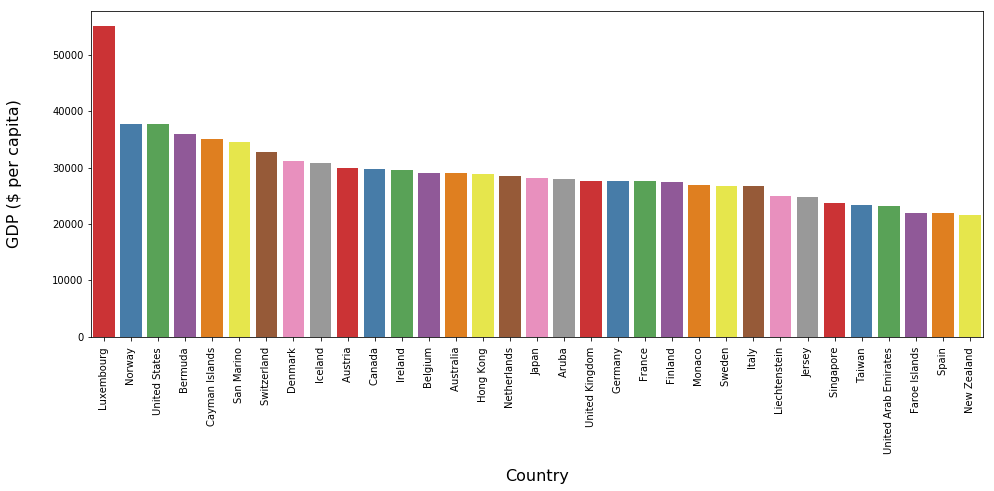

In [6]:
#Plotting the GDP per capita of  top 33 countries on Bar Plot graphs from the top that is .top()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

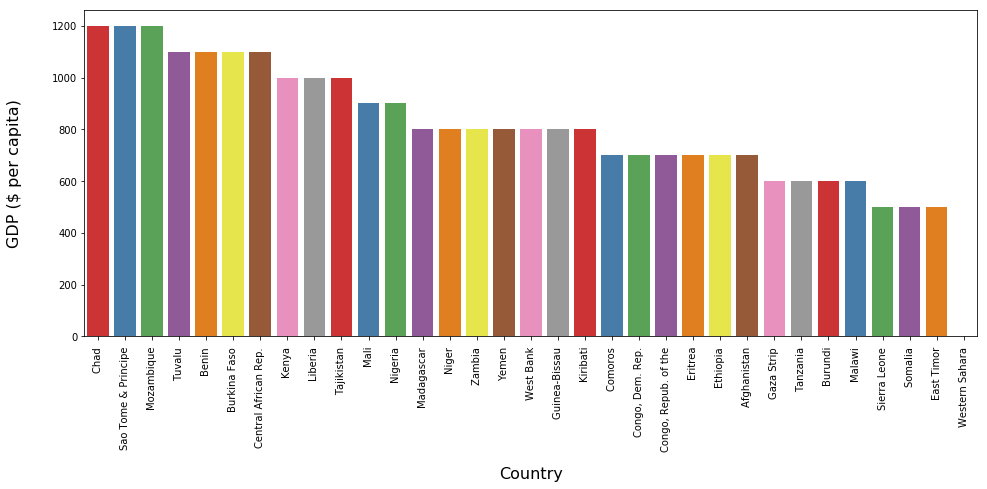

In [7]:
#Plotting the GDP per capita of  top 33 countries on Bar Plot graphs from the last that is .tail()

fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

<a id="2.4">****2.4 Data Cleaning****</a>

Data is the most important aspect of data scienc, if the data is inefficient and improperly formatted then the findings may be improper thus data cleansing is an important aspect, I am going to perform the following things on dataset to make it more accurate and less faulty

1. Finding the empty/null/Nan data values and fill them with the mean/median/mode where ever required as per suitability
2. check the data types and make them accurate inorder to increase the efficiency if needed
3. change the naming structure if required

In [8]:
# Checking for null values
world.isnull().values.any() 

True

In [9]:
# printing the sum of number of null values in columns
world.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [10]:
#Printing total number of null values in the data set
world.isnull().sum().sum()

110

In [11]:
#**Null Values**
#printing the total number of null values and calcuating its percentage
total = world.isnull().sum()[world.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(world)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


**1. Filling in the empty values**

Now we have 2 options either fill in the null values with mean/median/mode which ever is suitable for the column
or drop the null values, but since there are some important factors like literacy, infant mortality with null values and this factors have high aboslute value of coorelation we will fill in the data(Nan values) with mean.

In [12]:
#Finding the mean of literacy, agriculture and GDP based on regions since many countries are 
#located in the same geographical region we can sort them by regions
#using mean instead of median to be more precise
world.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].mean()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),8053.571429,79.553571,0.177643
BALTICS,11300.000000,99.733333,0.045000
C.W. OF IND. STATES,4000.000000,98.725000,0.192000
EASTERN EUROPE,9808.333333,97.088889,0.092167
LATIN AMER. & CARIB,8682.222222,90.654545,0.091023
NEAR EAST,10456.250000,79.521429,0.063812
NORTHERN AFRICA,5460.000000,67.240000,0.135000
NORTHERN AMERICA,26100.000000,97.750000,0.014000
OCEANIA,8247.619048,88.835294,0.175125


In [13]:
#.random method generates random number  we seed it so that same random numbers are generated every time and they dont change
np.random.seed(sum(map(ord, "distributions")))

In [14]:
world.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [15]:
#.fillna()-> Fill NA/NaN values using the specified method that is replace with mean of column
world.fillna(world.mean(),inplace=True)

In [16]:
#checking null values
world.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Plotting Box plots to check the range of literacy and GDP to check if it is to be considered as a factor affecting the GDP**

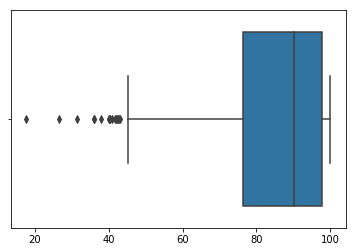

In [17]:
sns.boxplot(np.array(world['Literacy (%)']))

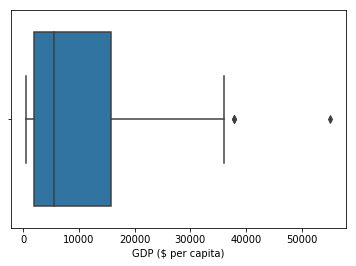

In [18]:
sns.boxplot(world['GDP ($ per capita)'])

**Now the data is cleaned that is empty values are removed**

<a id="2.5">****2.5 Visualization of Data****</a>

This is used to visually display the statitics based on graphs, heatmaps, box plots etc., this helps in decision making, pattern recognization and so on.

<a id="#">****Coorelation and heatmaps****</a>

**Correlation refers to a mutual relationship or association between quantities, Heatmaps are used to visualize correlation between two or more columns**




In [19]:
world.corr() #get the correlation between all numerical columns

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.022994,-0.039319,-0.043376,-0.030803,0.188201,-0.060741,-0.120575,-0.026439,-0.045075,-0.028354,0.000375,0.099109,-0.080681
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047442,-0.007159,0.072179,0.035784,0.053360,-0.079674,-0.143844,0.138904,-0.082128,-0.066389,0.040049,-0.050380,0.120907,-0.054080
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.177990,-0.144200,0.195751,0.095056,0.280079,-0.080999,-0.031655,0.081844,0.006830,-0.159150,-0.070022,-0.105925,-0.105524,0.187798
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134035,-0.136465,0.049109,0.113651,0.152050,-0.120636,0.341433,-0.079404,-0.031614,-0.075715,-0.161703,-0.028483,-0.185124,0.181939
Net migration,0.000011,0.047442,0.177990,-0.134035,1.000000,-0.025015,0.381969,-0.008506,0.239424,-0.057689,-0.340151,0.222815,-0.014878,-0.066523,0.033605,-0.105674,-0.023679,0.113697
Infant mortality (per 1000 births),0.022994,-0.007159,-0.144200,-0.136465,-0.025015,1.000000,-0.600002,-0.745543,-0.669715,-0.113094,-0.061159,0.123072,-0.342848,0.844968,0.655734,0.697303,0.003510,-0.618623
GDP ($ per capita),-0.039319,0.072179,0.195751,0.049109,0.381969,-0.600002,1.000000,0.497963,0.830549,0.019643,-0.218330,0.097215,0.302404,-0.648808,-0.201148,-0.570735,-0.027935,0.529995
Literacy (%),-0.043376,0.035784,0.095056,0.113651,-0.008506,-0.745543,0.497963,1.000000,0.549913,0.101927,0.038808,-0.102439,0.352569,-0.755196,-0.386376,-0.585492,0.060661,0.465706
Phones (per 1000),-0.030803,0.053360,0.280079,0.152050,0.239424,-0.669715,0.830549,0.549913,1.000000,0.059606,-0.149517,0.029317,0.358574,-0.722329,-0.259708,-0.571704,-0.140516,0.625770
Arable (%),0.188201,-0.079674,-0.080999,-0.120636,-0.057689,-0.113094,0.019643,0.101927,0.059606,1.000000,0.094361,-0.856763,0.353444,-0.183449,0.052991,-0.034080,-0.061923,0.088649


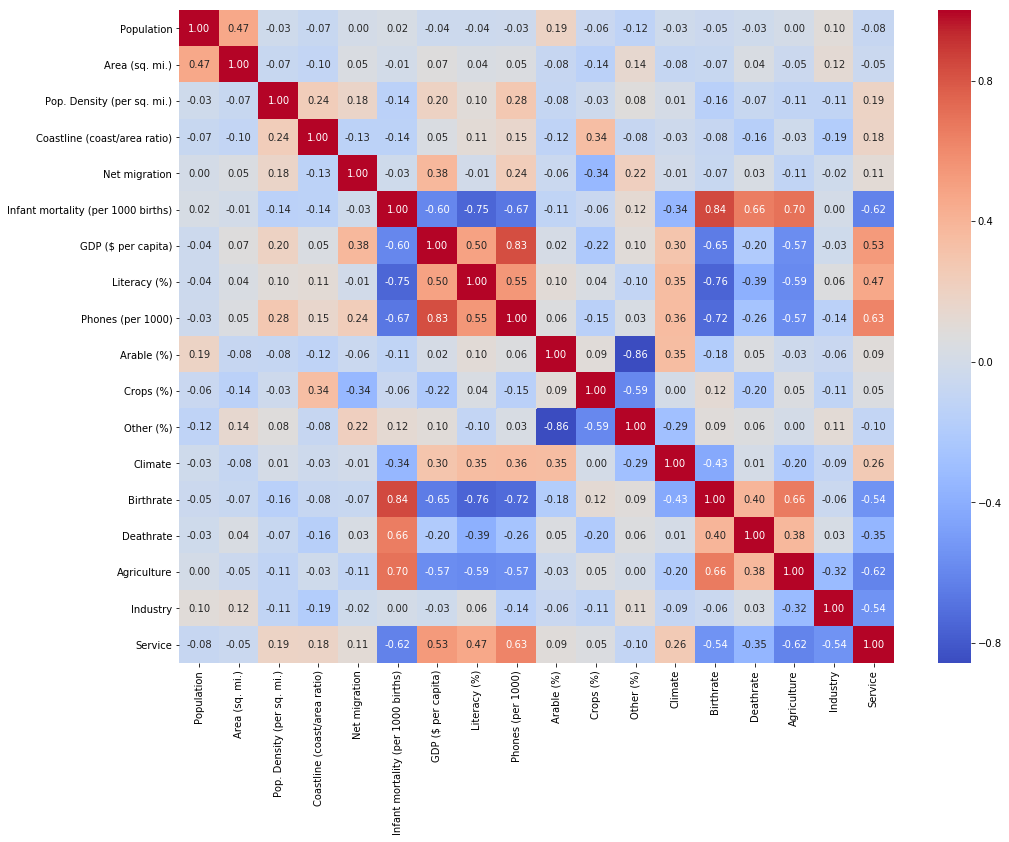

In [20]:
#Ploting heat maps to check for factors that affect the most to GDP 
plt.figure(figsize=(16,12))

#fmt='.2f'->2 decimals, annot -> numerical representation, iloc-> primary integer position
sns.heatmap(data=world.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Given that 'literacy','phones_per_1000','infant_mortality_per_1000_births','birthrate','deathrate' have higest absolute value correlation with 'gdp_$percapita' but if we carefully look at the heatmap few factors have negitive correlation like infant mortality birth rate and death rate. 

Some features, like phones, are related to the average GDP more linearlz, while others ano not. For example, high birthrate usuallz means low GDP per capita, but average GDP in low birthrate countries can vary a lot.

Hence we need to consider them as well

In [21]:
# choose attributes which shows relation
#Plotting heat graphs for the chosen attributes
x = world[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate']]

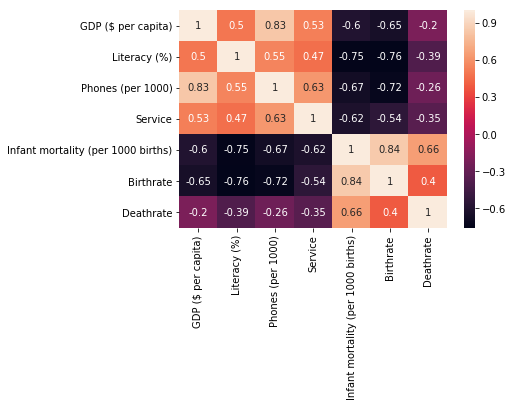

In [22]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

We can clearly see that literacy, phones and service are higly correlated to GDP but to further confirm we will plot the scatter plot.


**From the below scatterplot we can make out that for the features services and phones are highly correlated as the features increase the GDP increases as well that is they are positively correlated**

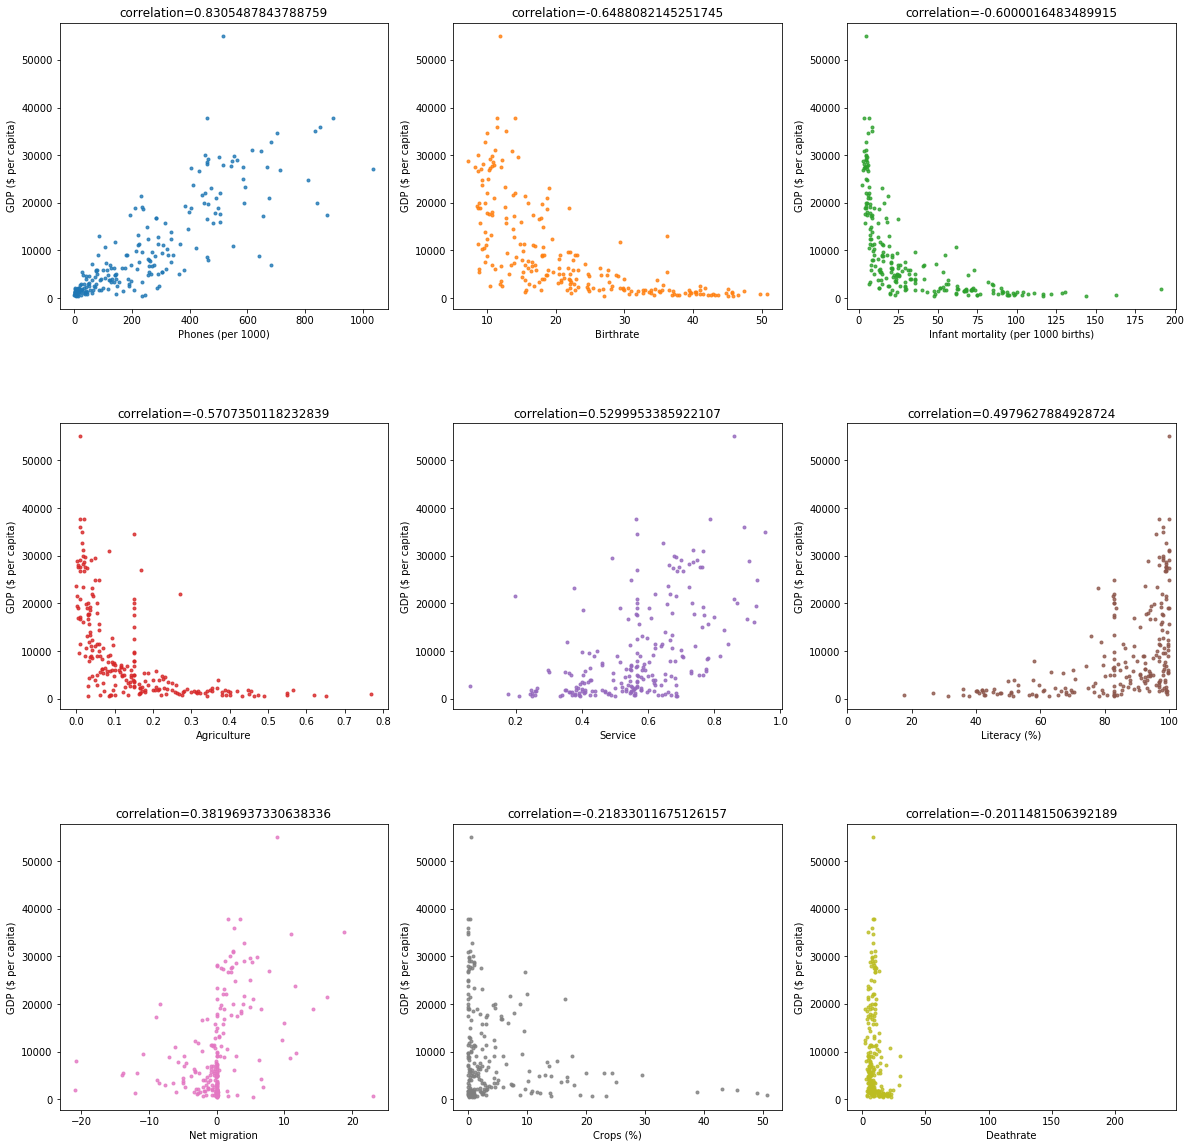

In [23]:
#scatterplots for each factor except climate since climate is not much correlated to GDP

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()  #one dimentional array with axis labels
for col in world.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')): #GDP and CLimate should not be considered
        corr_to_gdp[col] = world['GDP ($ per capita)'].corr(world[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False) #taking absolute value
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

#Plotting the scatter plots
for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=world,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

<a id="2.6">****2.6 Feature Selection****</a>

**Based on the above analysis the following features are highly and positively correlated to GDP**
1. Service
2. Phones(per 1000)

In [24]:
#calculating mean based on regions for the slected factors including GDP
world.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].mean()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),8053.571429,173.477194,0.520107
BALTICS,11300.000000,292.866667,0.661667
C.W. OF IND. STATES,4000.000000,163.850000,0.480167
EASTERN EUROPE,9808.333333,280.750000,0.598667
LATIN AMER. & CARIB,8682.222222,270.870254,0.646924
NEAR EAST,10456.250000,210.797590,0.530000
NORTHERN AFRICA,6164.970501,122.843572,0.432000
NORTHERN AMERICA,26100.000000,686.740000,0.698313
OCEANIA,8247.619048,189.885714,0.598544


**Pairplots:** They are basically used to map paired relationships in Data sets
The function used to draw will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

In [25]:
#Putting in the features along with GDP for the pair plot ahead
x = world[['GDP ($ per capita)','Phones (per 1000)','Service']]

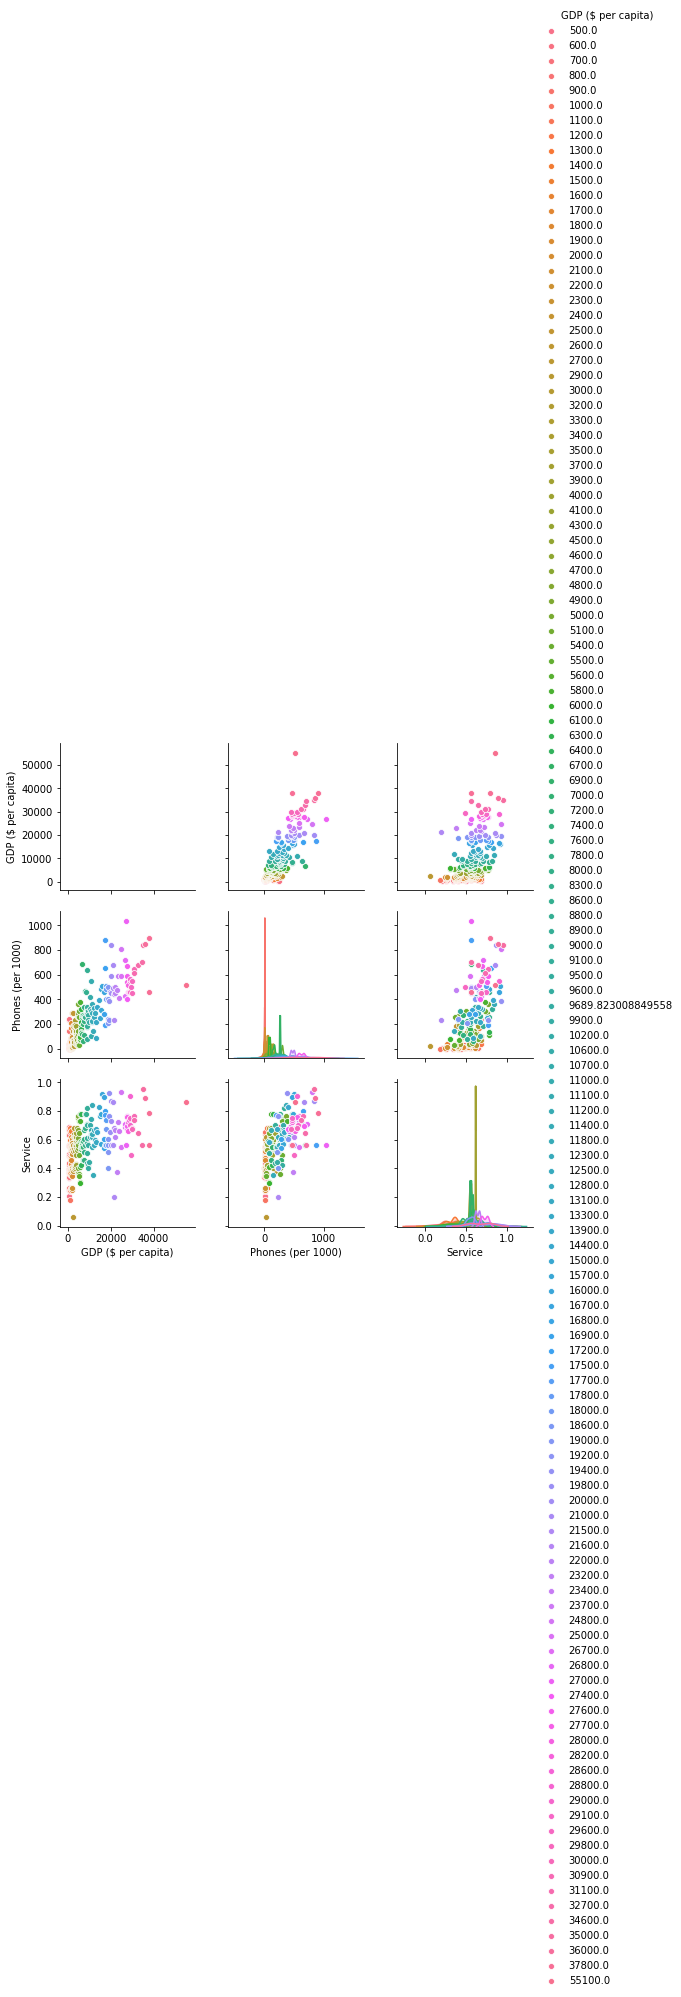

In [28]:
sns.pairplot(x, hue="GDP ($ per capita)") #hue ->Variable in data to map plot aspects to different colors.

In [29]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.830549,0.529995
Phones (per 1000),0.830549,1.000000,0.625770
Service,0.529995,0.625770,1.000000


Since we already removed the null values by replacing them with mean we can check the GDP from the data set to confirm if null vales are completely eliminated and get a hint of GDP valyes

In [30]:
world['GDP ($ per capita)'] # Display column values and data type

0        700.000000
1       4500.000000
2       6000.000000
3       8000.000000
4      19000.000000
5       1900.000000
6       8600.000000
7      11000.000000
8      11200.000000
9       3500.000000
10     28000.000000
11     29000.000000
12     30000.000000
13      3400.000000
14     16700.000000
15     16900.000000
16      1900.000000
17     15700.000000
18      6100.000000
19     29100.000000
20      4900.000000
21      1100.000000
22     36000.000000
23      1300.000000
24      2400.000000
25      6100.000000
26      9000.000000
27      7600.000000
28     16000.000000
29     18600.000000
           ...     
197     3300.000000
198    23400.000000
199     1000.000000
200      600.000000
201     7400.000000
202     1500.000000
203     2200.000000
204     9500.000000
205     6900.000000
206     6700.000000
207     5800.000000
208     9600.000000
209     1100.000000
210     1400.000000
211     5400.000000
212    23200.000000
213    27700.000000
214    37800.000000
215    12800.000000


<a id="2.7">****Flexibility plots and Box plots****</a>

Flexibly plot a univariate distribution of observations. --> sns.distplot()<br>
Box plots are drawn to show distributions with respect to categories --> sns.boxplot()

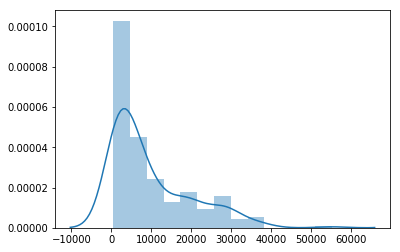

In [31]:
#checking distribution of GDP of the world
sns.distplot(np.array(world['GDP ($ per capita)']))

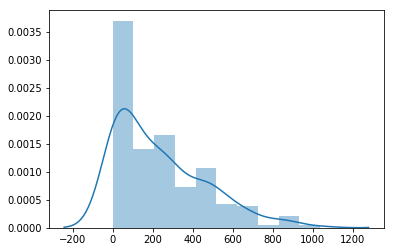

In [32]:
#checking distribution of Phones 
sns.distplot(np.array(world['Phones (per 1000)']))

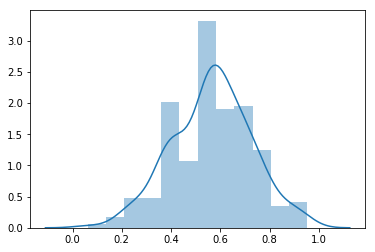

In [33]:
#checking distribution of Services
sns.distplot(np.array(world['Service']))

From the box plots below we can make out that the range of GDP is from 2000 to 16000, range of phones is from 10 to 400 approximately and that of service is from between 0.4 and 0.8

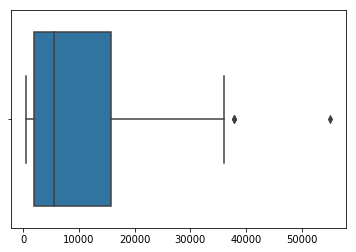

In [34]:
sns.boxplot(np.array(world['GDP ($ per capita)']))

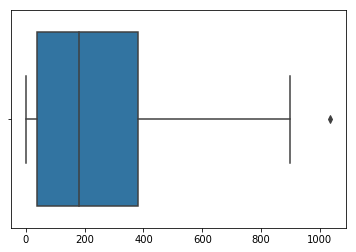

In [35]:
sns.boxplot(np.array(world['Phones (per 1000)']))

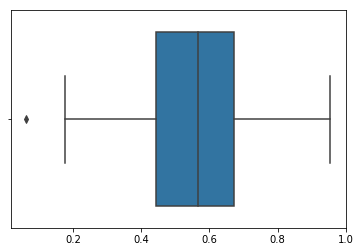

In [36]:
sns.boxplot(np.array(world['Service']))

# <a id='3'>3. Conclusion</a>

**From the above performed EDA we can conclude that the Independent factors Phones and Service have a strong linear relationship with the Factor Gross Domestic Product, but there are some factors like Birth rate which are directly related to the GDP that is more Birth rate would lead to low GDP so such factors cannot be excluded as well. So, in conclusion, the factors Service and Phones are in a highly linear relation with GDP and must be considered while Modelling that is training and testing**

# <a id='4'>4. Contributions Statement</a>

Approximately 80%-85% of the code was referred from the based-on Kernel provided by the professor, 10%-15% of the code was manipulated and written by me based on the documentations and citations.

# <a id='5'>5. Citations</a>

1. https://www.geeksforgeeks.org/python-for-data-science/ --> Method descriptions
2. https://www.kaggle.com/stieranka/predicting-gdp-world-countries/notebook  --> Based on this link
3. https://www.kaggle.com/mehmettek/data-science-with-world-countries --> Similar EDA used for reference
4. https://mode.com/python-tutorial/pandas-dataframe/     -> Python Documentation 
5. https://seaborn.pydata.org/  ->Seaborn Plots(Documentation)
6. https://www.wikipedia.org/ -> Definitions
7. https://pandas.pydata.org/pandas-docs/stable/ --> Pandas Documentation


# <a id='6'>6. License</a>

Copyright 2019 Cassian Gonsalves

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.